In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Print a confirmation message
print("Libraries imported successfully.")


Libraries imported successfully.


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming the file is saved as Healthcare_IoT_Dataset_Balanced.csv)
df = pd.read_csv('Healthcare_IoT_Dataset Balanced.csv')

# Data Preprocessing
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

df['Device Name'] = label_encoder.fit_transform(df['Device Name'])
df['Connectivity Status'] = label_encoder.fit_transform(df['Connectivity Status'])
df['Calibration Status'] = label_encoder.fit_transform(df['Calibration Status'])
df['Maintenance Status'] = label_encoder.fit_transform(df['Maintenance Status'])
df['Patient Criticality'] = label_encoder.fit_transform(df['Patient Criticality'])

# Check if there are any missing values
print(f"Missing values: \n{df.isnull().sum()}")

# Shuffle dataset to ensure randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Features and labels
X = df.drop(columns=["Device ID", "Label"])
y = df["Label"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape of the data to confirm successful split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Missing values: 
Device ID                   0
Device Name                 0
Battery Status (%)          0
Device Temperature (°C)     0
Event Logs                  0
Connectivity Status         0
Alert Response Time (ms)    0
Firmware Vulnerabilities    0
Calibration Status          0
Maintenance Status          0
Patient Criticality         0
Label                       0
dtype: int64
Training data shape: (18632, 10)
Test data shape: (4658, 10)


Cross-validation Mean Accuracy: 0.9992
Test Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2299
           1       1.00      1.00      1.00      2359

    accuracy                           1.00      4658
   macro avg       1.00      1.00      1.00      4658
weighted avg       1.00      1.00      1.00      4658

Confusion Matrix:
[[2295    4]
 [   1 2358]]


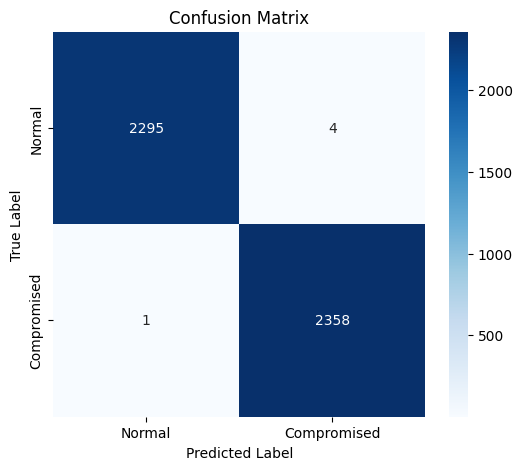

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10)

# Cross-validation (Stratified K-Fold to maintain class distribution)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_cv, y_train_cv)
    val_pred = model.predict(X_val_cv)
    fold_accuracy = accuracy_score(y_val_cv, val_pred)
    cross_val_scores.append(fold_accuracy)

print(f"Cross-validation Mean Accuracy: {np.mean(cross_val_scores):.4f}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Make Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Compromised'], yticklabels=['Normal', 'Compromised'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Cross-validation Mean Accuracy: 0.9950
Test Accuracy: 0.9974
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2299
           1       1.00      1.00      1.00      2359

    accuracy                           1.00      4658
   macro avg       1.00      1.00      1.00      4658
weighted avg       1.00      1.00      1.00      4658

Confusion Matrix:
[[2294    5]
 [   7 2352]]


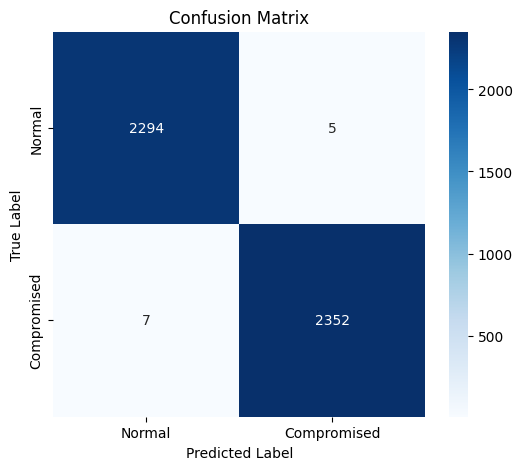

In [30]:
# Initialize a simpler model with more regularization
model = RandomForestClassifier(
    n_estimators=50,  # Reduce the number of trees
    random_state=42,
    max_depth=7,  # Reduce the depth of each tree
    min_samples_split=20,  # Require more samples to split a node
    min_samples_leaf=5,  # Minimum samples required to be a leaf node
    max_features='sqrt'  # Consider fewer features at each split
)

# Cross-validation (Stratified K-Fold to maintain class distribution)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_cv, y_train_cv)
    val_pred = model.predict(X_val_cv)
    fold_accuracy = accuracy_score(y_val_cv, val_pred)
    cross_val_scores.append(fold_accuracy)

print(f"Cross-validation Mean Accuracy: {np.mean(cross_val_scores):.4f}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Make Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Compromised'], yticklabels=['Normal', 'Compromised'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Cross-validation Mean Accuracy: 0.9981
Test Accuracy: 0.9970
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       1.00      0.99      1.00      2359

    accuracy                           1.00      4658
   macro avg       1.00      1.00      1.00      4658
weighted avg       1.00      1.00      1.00      4658

Confusion Matrix:
[[2299    0]
 [  14 2345]]


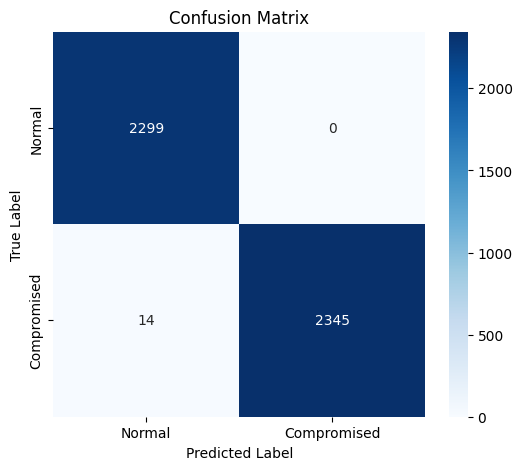

In [32]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost classifier with regularization
model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=5,       # Control overfitting by limiting tree depth
    learning_rate=0.05, # Lower learning rate to improve stability
    subsample=0.8,     # Randomly sample 80% of data to fit each tree
    colsample_bytree=0.8,  # Randomly sample features to grow each tree
    alpha=0.1,        # L2 regularization
    gamma=0.1,        # Minimum loss reduction for further partitioning
    random_state=42
)

# Cross-validation (Stratified K-Fold to maintain class distribution)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_cv, y_train_cv)
    val_pred = model.predict(X_val_cv)
    fold_accuracy = accuracy_score(y_val_cv, val_pred)
    cross_val_scores.append(fold_accuracy)

print(f"Cross-validation Mean Accuracy: {np.mean(cross_val_scores):.4f}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Make Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Compromised'], yticklabels=['Normal', 'Compromised'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
